In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb

In [2]:
number_cols = ['HP', 'Attack', 'Defense']
non_number_cols = ['Name', 'Type 1', 'Legendary', 'Type 2', '#']

df_pokemon = pd.read_csv('Pokemon.csv')
df_pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [3]:
df_selected = df_pokemon[number_cols + non_number_cols]
df_selected.head()

HP  Attack  Defense                   Name Type 1  Legendary  Type 2  #
0  45      49       49              Bulbasaur  Grass      False  Poison  1
1  60      62       63                Ivysaur  Grass      False  Poison  2
2  80      82       83               Venusaur  Grass      False  Poison  3
3  80     100      123  VenusaurMega Venusaur  Grass      False  Poison  3
4  39      52       43             Charmander   Fire      False     NaN  4

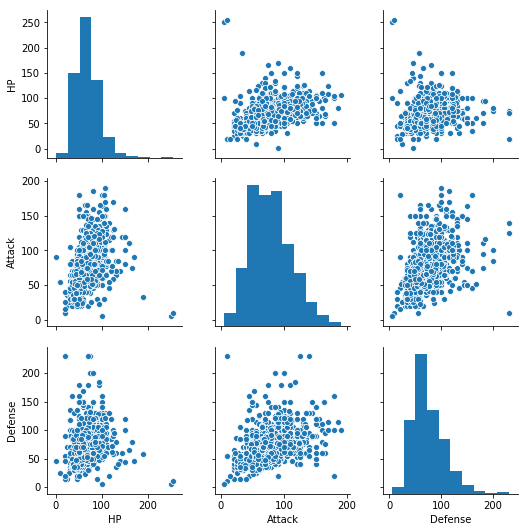

In [4]:
sns.pairplot(df_selected[number_cols])

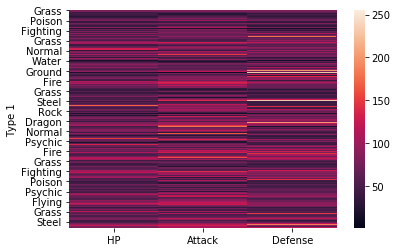

In [5]:
df_indexed = df_selected[number_cols + ["Type 1"]]
df_indexed = df_indexed.set_index("Type 1")

sns.heatmap(df_indexed)

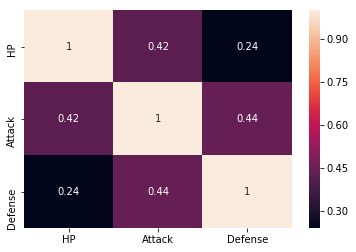

In [6]:
sns.heatmap(df_selected[number_cols].corr(), annot=True)
plt.show()

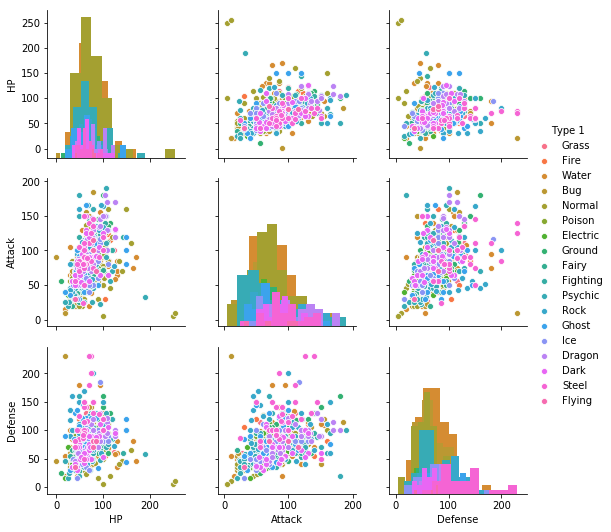

In [7]:
sns.pairplot(df_pokemon[number_cols + ["Type 1"]], hue="Type 1", diag_kind="hist")
plt.show()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


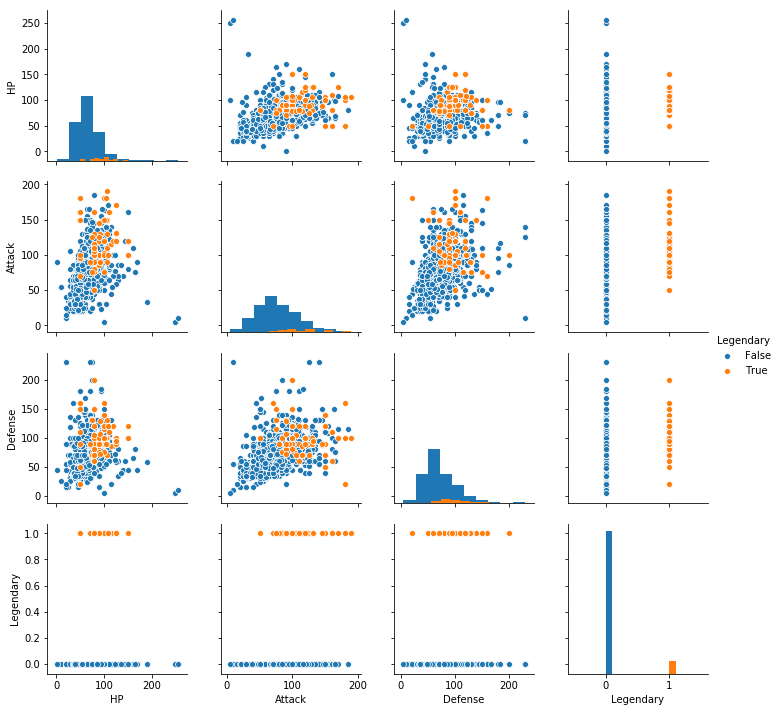

In [8]:
sns.pairplot(df_pokemon[number_cols + ["Legendary"]], hue="Legendary", diag_kind="hist")
plt.show()

In [9]:
sns.__version__

'0.9.0'

In [10]:
import matplotlib
matplotlib.__version__

'3.0.3'

In [11]:
#  !conda install matplotlib - wykonać w terminalu

# t-SNE - t-Distributed Stochastic Neighbor Embedding

In [12]:
# usuwamy kolumny z tekstem, zostawiamy tylko numeryczne
df_numeric = df_pokemon.drop(non_number_cols + ["Type 2", "#"], axis = 1)
df_numeric.head()

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0    318  45      49       49       65       65     45           1
1    405  60      62       63       80       80     60           1
2    525  80      82       83      100      100     80           1
3    625  80     100      123      122      120     80           1
4    309  39      52       43       60       50     65           1

In [13]:
# tworzymy model
model = TSNE(n_components=2, random_state=42)
tsne_features = model.fit_transform(df_numeric)

In [14]:
tsne_features.shape

(800, 2)

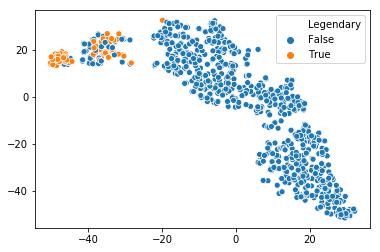

In [15]:
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue="Legendary", data=df_pokemon)

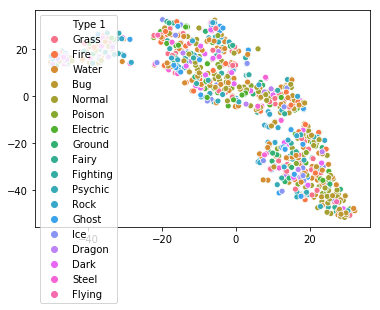

In [16]:
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue="Type 1", data=df_pokemon)

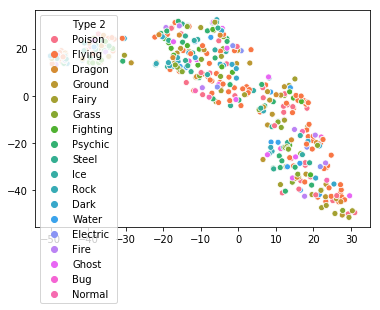

In [17]:
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue="Type 2", data=df_pokemon)

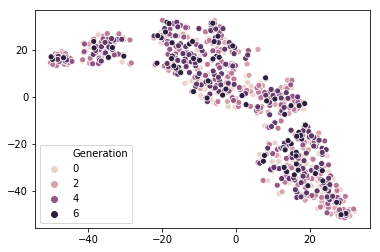

In [18]:
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue="Generation", data=df_pokemon)

In [19]:
tsne_features

array([[ 17.798794 , -29.533016 ],
       [ 13.027295 ,  -3.9034398],
       [-15.230124 ,  26.24768  ],
       ...,
       [-38.51924  ,  23.460415 ],
       [-50.068584 ,  16.882738 ],
       [-38.4228   ,  20.68209  ]], dtype=float32)

In [20]:
# chcemy nauczyć nasz model, dzielimy dane na TEST TRAIN
legendary = df_pokemon[df_pokemon["Legendary"]==True]
no_legendary = df_pokemon[df_pokemon["Legendary"]==False]
no_legendary.head()


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [26]:
# trenować będziemy dla cechy Legendary, zbiór dzielimy na 50% do treningu i 50% do testu
y = df_pokemon['Legendary']  # to co chcemy przewidywać
X = df_pokemon.drop(['Name', 'Type 1', 'Legendary', 'Type 2', '#'], axis=1)  # trzeba wyrzucic wszystkie dane tekstowe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)

In [22]:
"{} wiersze w zbiorze testowym, {} wiersze w zbiorze treningowym. {}: cech".format(X_test.shape[0], X_train.shape[0],
                                                                                  X_test.shape[1])

'400 wiersze w zbiorze testowym, 400 wiersze w zbiorze treningowym. 12: cech'

In [27]:
# zmiana procentu na 30% -  w wyniku mamy cały czas 12 cech
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

"{} wiersze w zbiorze testowym, {} wiersze w zbiorze treningowym. {}: cech".format(X_test.shape[0], X_train.shape[0],
                                                                                  X_test.shape[1])

'240 wiersze w zbiorze testowym, 560 wiersze w zbiorze treningowym. 8: cech'

In [28]:
X_train.head()

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
404    485  100      90      130       45       65     55           3
522    525   65      60      110      130       95     65           4
749    448   59     110      150       45       49     35           6
426    780  105     180      100      180      100    115           3
41     483   95      70       73       95       90     60           1

In [29]:
# tworzymy model, bedzie to SVC, ale musimy mieć w X i y same wartości liczbowe, wszystkie stringi trzeba zamienic
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

In [31]:
accuracy_train, accuracy_test
# model będzie przeuczony lub niedouczony gdy wystąpią znaczące różnice

(0.9964285714285714, 0.9375)

In [44]:
# chcemy usunąć zbędne wymiary -> potrzebujemy bibliotek make_pipeline, 
# StandardScaler, PCA i nowe SVC, chcemy zredukowac do 2 wymiarów, wiec podajemy jako n_components

svc = SVC(random_state=42)
pca = PCA(random_state=42, n_components=2)  # jednak rezygnujemy, zbadamy ile wymiarów chcemy
# pca = PCA(random_state=42)
scaler = StandardScaler()

# najpierw skalujemy, potem modele
pipeline = make_pipeline(scaler, pca, svc)

In [45]:
# wstrzykujemy dane do uczenia
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

<BarContainer object of 2 artists>

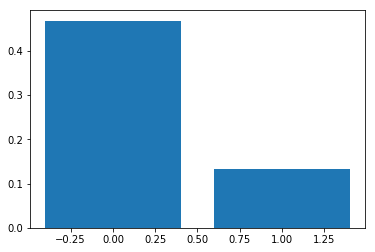

In [46]:
# chcemy liczbe wymiarów zobaczyc na wykresie
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
# z wykresy wychodzi, że właściwie wystarczy nam jeden wymiar, ale wtedy za dużo odrzucimy
# zatem moglibyśmy wziąć pierwszych 5 kolumn wiec jednak wracamy do 2 komponentów w def pca

In [47]:
accuracy_train = accuracy_score(y_train, pipeline.predict(X_train))
accuracy_test = accuracy_score(y_test, pipeline.predict(X_test))
accuracy_train, accuracy_test
# accuracy pogorszyło sie w stosunku do poprzedniego modelu, ale model jest stabilny, nie ma overfittingu

(0.9410714285714286, 0.9625)